In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy.ndimage import gaussian_filter
from matplotlib.colors import Normalize

con = sqlite3.connect('HW2.db')

df_2018 = pd.read_sql_query("SELECT * FROM crime_2018", con)
df_2020 = pd.read_sql_query("SELECT * FROM crime_2020", con)
df_2022 = pd.read_sql_query("SELECT * FROM crime_2022", con)

In [2]:
df = pd.concat([df_2018, df_2020, df_2022], ignore_index=True)
df['MONTH'] = pd.to_numeric(df['MONTH'])

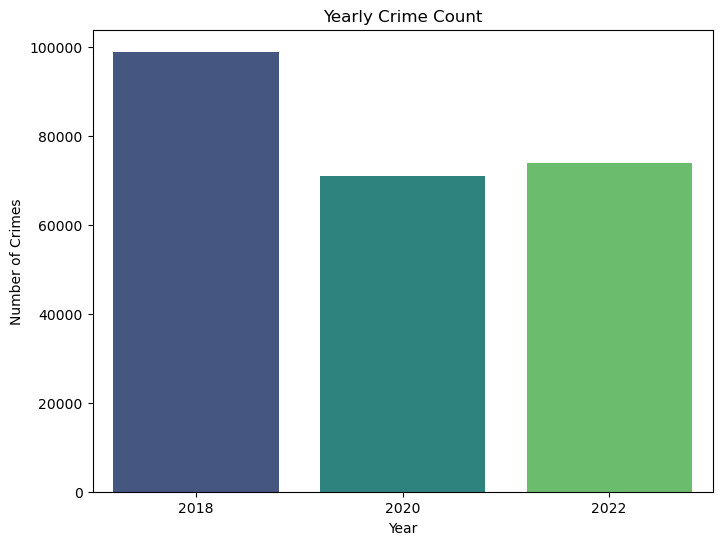

In [3]:
yearly_crimes = df.groupby('YEAR').size()

plt.figure(figsize=(8, 6))
sns.barplot(x=yearly_crimes.index, y=yearly_crimes.values, palette='viridis')
plt.title('Yearly Crime Count')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

In [4]:
monthly_crimes = df.groupby(['YEAR', 'MONTH']).size().reset_index(name='Crime Count')
monthly_crimes

,YEAR,MONTH,Crime Count
0,2018,1,7860
1,2018,2,6997
2,2018,3,7849
3,2018,4,8004
4,2018,5,9072
5,2018,6,9026
6,2018,7,8789
7,2018,8,8871
8,2018,9,8566
9,2018,10,8441


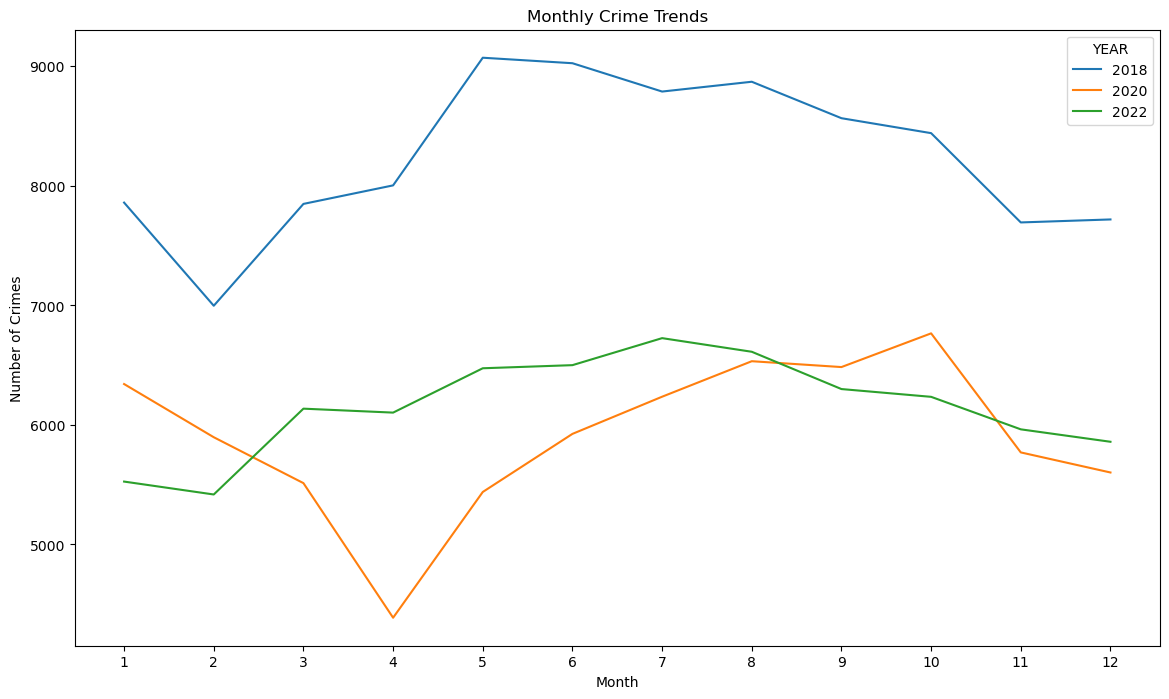

In [5]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_crimes, x='MONTH', y='Crime Count', hue='YEAR', palette='tab10')
plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1,13))
plt.show()

In [6]:
df['Long'] = pd.to_numeric(df['Long'])
df['Lat'] = pd.to_numeric(df['Lat'])

df_2018['Long'] = pd.to_numeric(df_2018['Long'])
df_2018['Lat'] = pd.to_numeric(df_2018['Lat'])

df = df[(df['Long'] > -71.175) & (df['Long'] < -71.000) & 
                 (df['Lat'] > 42.2) & (df['Lat'] < 42.380)]

df_filtered = df_filtered.copy()
df_filtered['YEAR'] = df_filtered['YEAR'].astype(int)
df_filtered_2018 = df_filtered[df_filtered['YEAR'] == 2018]
df_filtered_2020 = df_filtered[df_filtered['YEAR'] == 2020]
df_filtered_2022 = df_filtered[df_filtered['YEAR'] == 2022]

NameError: name 'df_filtered' is not defined

In [ ]:
plt.figure(figsize=(7.5,5))
sns.kdeplot(
    data=df_filtered_2018, 
    x='Long', 
    y='Lat',
    fill=True,
    thresh=0,
    levels=100,
    gridsize=200,
    cmap='Set2', 
    cbar=True
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density of Crimes in Boston (2018)')
plt.show()

In [ ]:
plt.figure(figsize=(7.5,5))
sns.kdeplot(
    data=df_filtered_2020, 
    x='Long', 
    y='Lat',
    fill=True,
    thresh=0,
    levels=100,
    gridsize=200,
    cmap='Set2', 
    cbar=True
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density of Crimes in Boston (2020)')
plt.show()

In [ ]:
plt.figure(figsize=(7.5,5))
sns.kdeplot(
    data=df_filtered_2022, 
    x='Long', 
    y='Lat',
    fill=True,
    thresh=0,
    levels=100,
    gridsize=200,
    cmap='rainbow', 
    cbar=True
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density of Crimes in Boston (2022)')
plt.show()

In [ ]:
query = """
SELECT DAY_OF_WEEK, HOUR, COUNT(*) as crime_count
FROM crime_2018
GROUP BY DAY_OF_WEEK, HOUR
ORDER BY DAY_OF_WEEK, HOUR
"""
crime_time = pd.read_sql_query(query, con)
crime_time['HOUR'] = crime_time['HOUR'].astype(int)

crime_time

In [ ]:
crime_time_pivot = crime_time.pivot('DAY_OF_WEEK', 'HOUR', 'crime_count')
crime_time_pivot = crime_time_pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
crime_time_pivot

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(crime_time_pivot, cmap='rainbow', vmax=1000)
plt.title('Crime Occurrences by Day and Hour (2018)')
plt.ylabel('Day of Week')
plt.xlabel('Hour')
plt.yticks(ticks=range(7), labels=week_days, rotation=0) 
plt.show()

In [ ]:
query = """
SELECT DAY_OF_WEEK, HOUR, COUNT(*) as crime_count
FROM crime_2020
GROUP BY DAY_OF_WEEK, HOUR
ORDER BY DAY_OF_WEEK, HOUR
"""
crime_time_20 = pd.read_sql_query(query, con)
crime_time_20['HOUR'] = crime_time_20['HOUR'].astype(int)

crime_time_20_pivot = crime_time_20.pivot('DAY_OF_WEEK', 'HOUR', 'crime_count')
crime_time_20_pivot = crime_time_20_pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

crime_time_20_pivot

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(crime_time_20_pivot, cmap='rainbow', vmax=1000)
plt.title('Crime Occurrences by Day and Hour (2020)')
plt.ylabel('Day of Week')
plt.xlabel('Hour')
plt.yticks(ticks=range(7), labels=week_days, rotation=0)
plt.show()

In [ ]:
query = """
SELECT DAY_OF_WEEK, HOUR, COUNT(*) as crime_count
FROM crime_2022
GROUP BY DAY_OF_WEEK, HOUR
ORDER BY DAY_OF_WEEK, HOUR
"""
crime_time_22 = pd.read_sql_query(query, con)
crime_time_22['HOUR'] = crime_time_22['HOUR'].astype(int)

crime_time_22_pivot = crime_time_22.pivot('DAY_OF_WEEK', 'HOUR', 'crime_count')
crime_time_22_pivot = crime_time_22_pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 8))
sns.heatmap(crime_time_22_pivot, cmap='rainbow', vmax=1000)
plt.title('Crime Occurrences by Day and Hour (2022)')
plt.ylabel('Day of Week')
plt.xlabel('Hour')
plt.yticks(ticks=range(7), labels=week_days, rotation=0) 
plt.show()

## DISCLAIMER: In the above two graphs, the 0-hour statistics are higher than in 2018 due to the increase in (primarily) the number of "Sick Assist" and "Investigate Person" incidents logged at those hours. This may be due to the method of reporting incidents rather than a true increase in crime rates at those hours. 

In [ ]:
query = """
select MONTH, count(*) as COUNT
from crime_2018
where SHOOTING = 'Y'
group by month
"""

shootings_18 = pd.read_sql(query, con)
shootings_18['MONTH'] = shootings_18['MONTH'].astype(int)
shootings_18.sort_values(by='MONTH', inplace=True)
shootings_18

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=shootings_18, x='MONTH', y='COUNT')
plt.title('Monthly Shootings in 2018')
plt.xlabel('Month')
plt.ylabel('# of Shootings')
plt.xticks(range(1,13))
plt.show()

In [ ]:
query = """
select MONTH, count(*) as COUNT
from crime_2020
where SHOOTING = 1
group by month
"""

shootings_20 = pd.read_sql(query, con)
shootings_20['MONTH'] = shootings_20['MONTH'].astype(int)
shootings_20.sort_values(by='MONTH', inplace=True)
shootings_20

plt.figure(figsize=(14, 8))
sns.lineplot(data=shootings_20, x='MONTH', y='COUNT')
plt.title('Monthly Shootings in 2020')
plt.xlabel('Month')
plt.ylabel('# of Shootings')
plt.xticks(range(1,13))
plt.show()

In [ ]:
query = """
select MONTH, count(*) as COUNT
from crime_2022
where SHOOTING = 1
group by month
"""

shootings_22 = pd.read_sql(query, con)
shootings_22['MONTH'] = shootings_22['MONTH'].astype(int)
shootings_22.sort_values(by='MONTH', inplace=True)
shootings_22

plt.figure(figsize=(14, 8))
sns.lineplot(data=shootings_22, x='MONTH', y='COUNT')
plt.title('Monthly Shootings in 2020')
plt.xlabel('Month')
plt.ylabel('# of Shootings')
plt.xticks(range(1,13))
plt.show()

In [ ]:
df = pd.concat([shootings_18, shootings_20, shootings_22], ignore_index=True)

yearly_shootings = df.groupby('MONTH')
df